<a href="https://colab.research.google.com/github/drago467/DATA-MINING/blob/main/Word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

In [3]:
agri_df = pd.read_csv('Agri.csv')
bidv_df = pd.read_csv('BIDV.csv')
vcb_df = pd.read_csv('VCB.csv')
vietin_df = pd.read_csv('Vietin.csv')

<ipython-input-3-81addc00a41b>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  vcb_df = pd.read_csv('VCB.csv')


In [4]:
print("Agri DataFrame:")
print(agri_df.head())

print("\nBIDV DataFrame:")
print(bidv_df.head())

print("\nVCB DataFrame:")
print(vcb_df.head())

print("\nVietin DataFrame:")
print(vietin_df.head())

Agri DataFrame:
    date  bank        id   money  \
0  09/09  Agri   1375649  500000   
1  10/09  Agri   2882370   50000   
2  10/09  Agri  92865150  100000   
3  10/09  Agri   2847919  100000   
4  10/09  Agri  92875865  500000   

                                                desc  page  
0  NGUYEN THI ANH ung ho dong bao bao lu thien tai .     1  
1    NGUYEN THI HONG DUYEN ung ho cac tinh bi bao lu     1  
2                         Ung ho cac tinh bi bao lut     1  
3                           BUI THI NINH chuyen tien     1  
4  NGUYEN MINH QUANG ung ho cac tinh bi bao lu FT...     1  

BIDV DataFrame:
             date  bank  id   money  \
0  01/09 10:27:58  BIDV   1  150000   
1  02/09 07:29:20  BIDV   2    1500   
2  03/09 06:59:55  BIDV   3    6314   
3  03/09 07:19:50  BIDV   4    4188   
4  03/09 12:08:28  BIDV   5   20000   

                                            desc page  
0  1261122666 Ung ho nguoi co hoan canh kho khan    _  
1          1261122666 TRAN QUANG HUY 

# **Xử lý dữ liệu Agribank**

In [20]:
# Hàm loại bỏ chuỗi viết hoa liên tục và các dãy số liền nhau
def remove_uppercase_and_numbers(desc):
    # Biểu thức regex tìm các cụm từ viết hoa liên tiếp (có thể gồm nhiều từ) hoặc chuỗi số
    pattern = r'\b[A-Z]+\b|\d+|â€“ A/C|_'
    return re.sub(pattern, '', desc).strip()

# Áp dụng hàm loại bỏ tên người gửi và chuỗi số cho cột 'desc'
agri_df['cleaned_desc'] = agri_df['desc'].apply(remove_uppercase_and_numbers)

# Hiển thị kết quả
print("Dữ liệu đã làm sạch:")
print(agri_df[['date', 'bank', 'id', 'money', 'cleaned_desc']])

Dữ liệu đã làm sạch:
        date  bank        id   money  \
0      09/09  Agri   1375649  500000   
1      10/09  Agri   2882370   50000   
2      10/09  Agri  92865150  100000   
3      10/09  Agri   2847919  100000   
4      10/09  Agri  92875865  500000   
...      ...   ...       ...     ...   
42447  12/09  Agri  96490575  500000   
42448  12/09  Agri  96490993  200000   
42449  12/09  Agri  96491358  114000   
42450  12/09  Agri  96491993  300000   
42451  12/09  Agri  96492659  300000   

                                            cleaned_desc  
0                     ung ho dong bao bao lu thien tai .  
1                              ung ho cac tinh bi bao lu  
2                             Ung ho cac tinh bi bao lut  
3                                            chuyen tien  
4                           ung ho cac tinh bi bao lu FT  
...                                                  ...  
42447               TTC  Van Quan ung ho dong bao lu lut  
42448     Ung ho dong bao 

# **Xử lý dữ liệu BIDV**

In [19]:
# Hàm loại bỏ chuỗi viết hoa liên tục và các dãy số liền nhau
def remove_uppercase_and_numbers(desc):
    # Biểu thức regex tìm các cụm từ viết hoa liên tiếp hoặc chuỗi số dài hơn 6 ký tự
    pattern = r'\b[A-Z]+\b|\d+|â€“ A/C|_'
    return re.sub(pattern, '', desc).strip()

# Áp dụng hàm loại bỏ tên người gửi và chuỗi số cho cột 'desc'
bidv_df['cleaned_desc'] = bidv_df['desc'].apply(remove_uppercase_and_numbers)

# Hiển thị kết quả
print("Dữ liệu BIDV đã làm sạch:")
print(bidv_df[['date', 'bank', 'id', 'money', 'cleaned_desc']])

Dữ liệu BIDV đã làm sạch:
                 date  bank   id    money  \
0      01/09 10:27:58  BIDV    1   150000   
1      02/09 07:29:20  BIDV    2     1500   
2      03/09 06:59:55  BIDV    3     6314   
3      03/09 07:19:50  BIDV    4     4188   
4      03/09 12:08:28  BIDV    5    20000   
...               ...   ...  ...      ...   
16639           19/09  BIDV  155   195000   
16640           19/09  BIDV  156  5000000   
16641           19/09  BIDV  157    50000   
16642           19/09  BIDV  158  3800000   
16643           19/09  BIDV  159     2000   

                                            cleaned_desc  
0                     Ung ho nguoi co hoan canh kho khan  
1                                            Chuyen tien  
2                                            Chuyen tien  
3                                            Chuyen tien  
4                                            Chuyen tien  
...                                                  ...  
16639  xxx TKThe :xx

# **Xử lý dữ liệu VCB**

In [18]:
# Hàm để loại bỏ tất cả các chuỗi số và các cụm từ viết hoa liên tục (tên người)
def clean_desc(desc):
    # Biểu thức regex để tìm các chuỗi số và các cụm từ viết hoa
    pattern = r'\b[A-Z]+\b|\d+|â€“ A/C|_'
    return re.sub(pattern, '', desc).strip()

# Áp dụng hàm làm sạch cho cột 'desc'
vcb_df['cleaned_desc'] = vcb_df['desc'].apply(clean_desc)

# Hiển thị kết quả
print("Dữ liệu sau khi làm sạch:")
print(vcb_df[['date', 'bank', 'id', 'money', 'cleaned_desc']])

Dữ liệu sau khi làm sạch:
          date bank            id   money  \
0        01/09  VCB    5213.45946   50000   
1        01/09  VCB    5090.85797   20000   
2        01/09  VCB    5241.83107   29000   
3        01/09  VCB    5218.87149    3000   
4        01/09  VCB    5388.96713    3000   
...        ...  ...           ...     ...   
1370628  14/09  VCB  205108.00000  500000   
1370629  14/09  VCB  205109.00000  100000   
1370630  14/09  VCB  205110.00000   50000   
1370631  14/09  VCB  205111.00000  100000   
1370632  14/09  VCB  205112.00000  200000   

                                              cleaned_desc  
0                                            ...xin cam on  
1                                 ..//. .  tu  toi       -  
2                     ..   chuyen tien. tu     toi       -  
3                                        ...   chuyen tien  
4                               JDC. ..Vietcombank::   MHS  
...                                                    ...  
137062

# **Xử lý dữ liệu Viettin**

In [17]:
# Hàm để loại bỏ chuỗi số, các từ viết hoa hoàn toàn và các ký tự lạ, nhưng giữ từ như "Chuyen tien"
def clean_desc(desc):
    # Biểu thức regex để tìm các từ viết hoa hoàn toàn, chuỗi số và ký tự lạ
    pattern = r'\b[A-Z]+\b|\d+|â€“ A/C|_'
    return re.sub(pattern, '', desc).strip()

# Áp dụng hàm làm sạch cho cột 'desc'
vietin_df['cleaned_desc'] = vietin_df['desc'].apply(clean_desc)

# Hiển thị kết quả
print("Dữ liệu sau khi làm sạch:")
print(vietin_df[['date', 'bank', 'id', 'money', 'cleaned_desc']])

Dữ liệu sau khi làm sạch:
                  date    bank     id   money  \
0       10/09 12:01:29  Vietin      1  300000   
1       10/09 12:01:46  Vietin      2  100000   
2       10/09 13:33:47  Vietin      3  100000   
3       10/09 13:34:31  Vietin      4  100000   
4       10/09 13:37:09  Vietin      5  100000   
...                ...     ...    ...     ...   
190432  17/09 23:10:12  Vietin  14323  100000   
190433  17/09 23:10:26  Vietin  14324  200000   
190434  17/09 23:10:37  Vietin  14325  500000   
190435  17/09 23:10:48  Vietin  14326   30000   
190436  17/09 23:10:53  Vietin  14327  100000   

                                             cleaned_desc  
0       nhanh  den:    chuyen tien ung ho nguoi dan vu...  
1          nhanh  den: Phuong Quynh Le chuyen tien    – /  
2                          Chuyen tien ung ho (CT)    – /  
3                          chuyen tien ung ho (CT)    – /  
4       Chuyen tien den tu  Noi dung:    chuyen ung ho...  
...                      

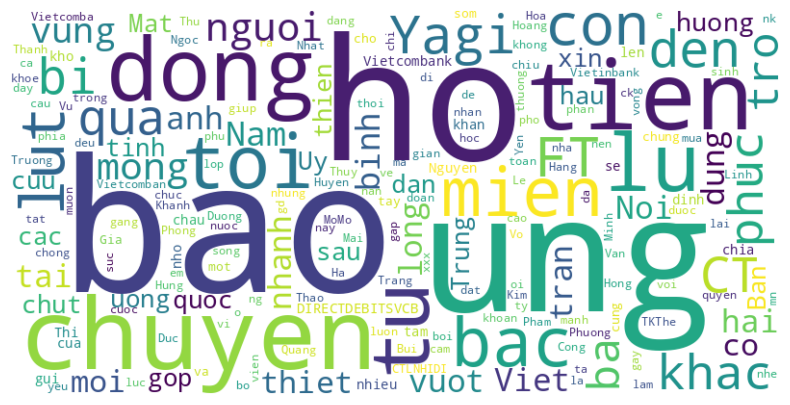

In [25]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Giả định rằng bạn đã có DataFrame với cột 'cleaned_desc' chứa các mô tả đã làm sạch
# df_vcb, df_bidv, df_vietin, df_agri đều có cột 'cleaned_desc'
# Hợp nhất cột 'cleaned_desc' từ tất cả các DataFrame vào một DataFrame duy nhất

# Ví dụ bạn có các DataFrame sau:
# df_vcb, df_bidv, df_vietin, df_agri
# Kết hợp các cột 'cleaned_desc' của cả 4 ngân hàng
combined_df = pd.concat([vcb_df['cleaned_desc'], bidv_df['cleaned_desc'], vietin_df['cleaned_desc'], agri_df['cleaned_desc']], ignore_index=True)

# Kết hợp tất cả các mô tả thành một chuỗi duy nhất
text = ' '.join(combined_df)

# Tạo WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200, collocations=False).generate(text)

# Hiển thị WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ẩn các trục
plt.show()